# 11장. 해시 테이블

## 1. 용어 정리
- 해시 테이블(해시 맵): 키를 값에 매핑할 수 있는 구조인 연관 배열 추상 자료형(ADT)을 구현하는 자료
  - 대부분 연산이 분할 상환 분석에 따른 시간 복잡도가 O(1)
  - 데이터 양에 관계 없이 빠른 성능을 기대할 수 있다는 장점
  - 1953년 IBM의 Hans Peter Luhn이 사내 메모에서 해싱과 체이닝을 결합하여 사용


- 해시 함수
  - 임의 크기 데이터를 고정 크기 값으로 매핑하는 데 사용할 수 있는 함수
  - 화살표로 표시된 특정 함수를 통과하면 2바이트 고정 크기 값으로 매핑
  - 화살표 역할을 하는 함수가 해시 함수
    - ABC → A1
    - 1324BC → CB
    - AF32B → D5
  
  
  - 성능 좋은 해시 함수 특징
    - 해시 함수 값 충돌 최소화
    - 쉽고 빠른 연산
    - 해시 테이블 전체에 해시 값이 균일하게 분포
    - 해시 테이블 사용 효율이 높을 것
    
    
- 해싱(Hashing)
  - 해시 테이블을 인덱싱하기 위해 해시 함수를 사용하는 것
  - 정보를 빠르게 저장하고 검색하기 위해 사용하는 기법
  - 최적 검색이 필요한 분야에 사용되며, 심볼 테이블 등 자료구조 구현에도 적합함
  - 추가로, 체크섬, 손실 압축, 무작위화 함수, 암호 등과도 관련이 깊음

## 2. 해시 함수 값 충돌 발생 예시
- 해시 함수에는 충돌이 쉽게 발생하게 됨

### 1) 생일 문제
- 생일 가짓수는 365개(윤년 제외)지만, 생일이 겹칠 확률은 23명만 모여도 50%를 넘고 57명이 모이면 99%를 넘어섬

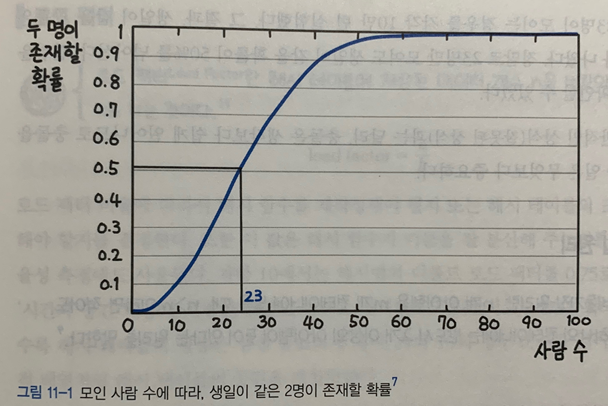

In [1]:
import random

TRIALS = 100000 #10만 번 실험
same_birthdays = 0 #생일이 같은 실험의 수

# 10만 번 실험 진행하기
for _ in range(TRIALS):
    birthdays = []
    # 23명 모임에서 생일이 같을 경우 same_birthdays +=1
    for i in range(23):
        birthday = random.randint(1,365)
        if birthday in birthdays:
            same_birthdays +=1
            break
        birthdays.append(birthday)

# 전체 10만 번 실험 중, 생일이 같은 실험의 확률
print(f'{same_birthdays / TRIALS * 100}%')

50.495999999999995%


### 2) 비둘기집 원리
- 비둘기집 원리(서랍 원리): n개 아이템을 m개의 컨테이너에 넣을 때, n>m이라면 적어도 하나의 컨테이너에는 반드시 2개 이상의 아이템이 들어 있다는 원리

- 비둘기집 원리에 따라 9개 공간이 있는 곳에 10개의 아이템이 들어온다면, 반드시 1번 이상은 충돌이 발생  
  

### 3) 로드 팩터
- 로드 팩터(Load Factor): 해시 테이블에 저장된 데이터 개수 n을 버킷 개수 k로 나눈 것
- load factor = $\frac{n}{k}$

- 로드 팩터 비율에 따라
  - 해시 함수를 재작성해야 할지, 해시 테이블 크기를 조정해야 할지 결정 
  - 해시 함수가 키들을 잘 분산하는지 효과 측정

- 일반적으로 로드 팩터가 증가할수록 해시 테이블 성능 감소  


### 4) 해시 함수
- 해싱: 해시 테이블을 인덱싱하기 위해 해시 함수를 사용하는 것

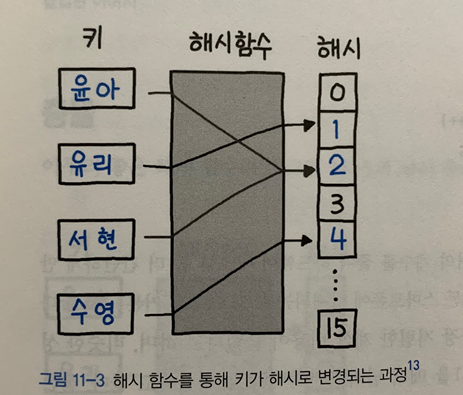

- 해시 함수를 통해 키가 해시로 변경되는 과정

## 3. 충돌

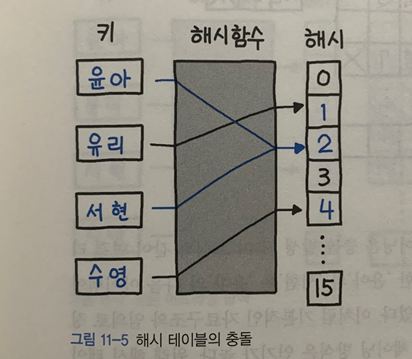

- 충돌이 발생하는 경우 처리 방법 찾아보기

### 1) 개별 체이닝

- 입력값 예시

키|값|해시|충돌 여부
---|---|---|---
윤아|15|2|충돌
유리|47|1| 
서현|17|2|충돌
수영|7|4| 

- 개별 체이닝(Separate Chaining) 방식으로 구현

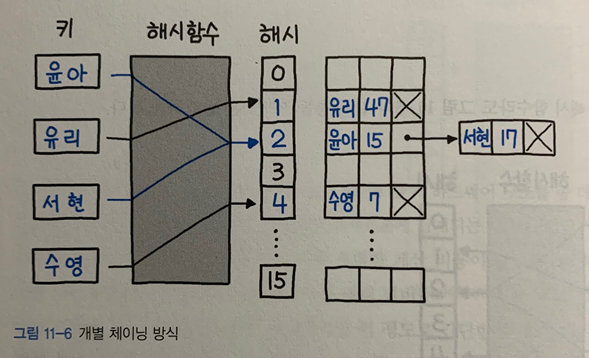


- 개별 체이닝은 충돌 발생 시, 연결 리스트로 연결하는 방식
  - 충돌이 발생한 '윤아', '서현'은 '윤아' 다음 아이템이 '서현'인 형태의 연결 리스트로 연결
  

- 원리
  1. 키의 해시 값 계산
  2. 해시 값을 이용해 배열 인덱스 구하기
  3. 같은 인덱스가 있다면 연결 리스트로 연결

### 2) 오픈 어드레싱

- 오픈 어드레싱(Open Addressing)
  - 충돌 발생 시, 탐사(Probing)를 통해 빈 공간을 찾는 방식
  - 전체 슬롯 개수 이상은 저장 불가
  - 모든 원소가 반드시 자신의 해시값과 일치하는 주소에 저장된다는 보장이 없음

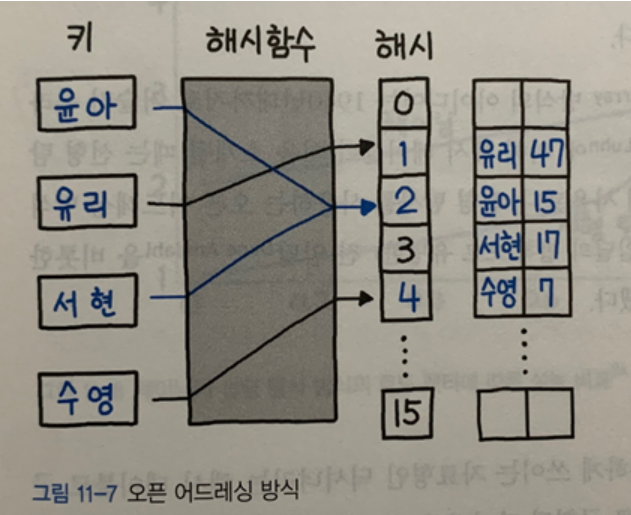


- 오픈 어드레싱 방식 중, 가장 간단한 방식인 선형 탐사(Linear Probing) 방식
- 충돌 발생 시, 해당 위치부터 순차적으로 탐사를 진행  
  → 특정 위치가 선점되어 있으면 바로 다음 위치를 확인  
  → 탐사를 진행하면서 빈 공간을 발견하면 삽입
    - '윤아' 다음에 '서현' 해시값이 동일한 2로 충돌이 발생했고, 다음 빈 위치를 탐색하여 3에 '서현'을 배치


- 선형 탐사 문제점
  - 클러스터링(Clustering): 해시 테이블에 저장되는 데이터가 고르게 분포되지 않고 뭉치는 경향이 있음
    - 클러스터들이 커지면 인근 클러스터와 합쳐지는 일이 발생
    - 해시 테이블 특정 위치에는 데이터가 몰리고, 다른 위치에는 상대적으로 데이터가 거의 없어짐  
      → 탐사 시간을 증가시키고 전체적으로 해싱 효율을 떨어뜨림
 

- 정리
  - 오픈 어드레싱 방식은 버킷 사이즈보다 큰 경우에 삽입 불가
  - 일정 이상 채워지면(= 기준이 되는 로드 팩터 비율을 넘어서면) 그로스 팩터 비율에 따라 더 큰 크기의 버킷을 생성한 후 새롭게 복사하는 리해싱 작업이 필요

### 3) 언어별 해시 테이블 구현 방식
- Q: 해시 테이블로 구현된 파이썬의 자료형을 제시하라.
- A: 딕셔너리


- 파이썬의 해시 테이블은 충돌 시, 오픈 어드레싱 방식으로 구현됨
  - 오픈 어드레싱 방식으로 성능을 높이고, 로드 팩터를 적게 잡아 성능 저하 문제를 해결
  - 추가) 파이썬이 체이닝을 사용하지 않는 이유
    - 연결 리스트를 만들기 위해서는 추가 메모리 할당이 필요한데, 추가 메모리 할당은 상대적으로 느림

## 4. 문제 풀이
### 1) 28번 해시맵 디자인

Q. 다음의 기능을 제공하는 해시맵을 디자인하라.  

- put(key, value): 키, 값을 해시맵에 삽입한다. 만약 이미 존재하는 키라면 업데이트한다.
- get(key): 키에 해당하는 값을 조회한다. 만약 키가 존재하지 않는다면 -1을 리턴한다.
- remove(key): 키에 해당하는 키, 값을 해시맵에서 삭제한다.

#### 풀이: 개별 체이닝 방식을 이용한 해시 테이블 구현 

In [2]:
import collections

# 단순연결리스트 정의
class ListNode:
    def __init__(self, key=None, value=None):
        self.key = key
        self.value = value
        self.next = None

class MyHashMap:
    # 초기화
    def __init__(self):
        self.size = 1000 
        self.table = collections.defaultdict(ListNode)

    # 1. 키, 값 해시맵에 삽입 (이미 존재하면 업데이트)
    def put(self, key: int, value: int) -> None:
        index = key % self.size
        # 인덱스에 노드가 없다면 삽입 후 종료
        if self.table[index].value is None:
            self.table[index] = ListNode(key, value)
            return

        # 인덱스에 노드가 존재하는 경우 연결 리스트 처리
        p = self.table[index]
        while p:
            if p.key == key:
                p.value = value
                return
            if p.next is None:
                break
            p = p.next
        p.next = ListNode(key, value)

    # 2. 키에 해당하는 값 조회 (키가 없으면 -1 리턴)
    def get(self, key: int) -> int:
        index = key % self.size
        if self.table[index].value is None:
            return -1

        # 노드가 존재할때 일치하는 키 탐색
        p = self.table[index]
        while p:
            if p.key == key:
                return p.value
            p = p.next # next에서 찾을 수 있도록
        return -1

    # 3. 키에 해당하는 키, 값 삭제
    def remove(self, key: int) -> None:
        index = key % self.size
        if self.table[index].value is None:
            return

        # 인덱스의 첫 번째 노드일때 삭제 처리
        p = self.table[index]
        if p.key == key:
            self.table[index] = ListNode() if p.next is None else p.next
            return

        # 연결 리스트 노드 삭제
        prev = p
        while p:
            if p.key == key:
                prev.next = p.next
                return
            prev, p = p, p.next

if __name__ == '__main__':
    hash_map = MyHashMap()
print('put(1,1): ',hash_map.put(1,1)) # put은 입력이므로 None 추출
print('put(2,2): ',hash_map.put(2,2))
print('get(1): ',hash_map.get(1)) # 1 리턴
print('get(3): ',hash_map.get(3)) # -1 리턴(키가 존재하지 않음)
print('put(2,1): ',hash_map.put(2,1)) # 값 업데이트
print('get(2): ',hash_map.get(2)) # 1을 리턴
print('remove(2): ',hash_map.remove(2)) # 키 2에 해당하는 키, 값 삭제
print('get(2): ',hash_map.get(2)) # -1 리턴(키 삭제되어 존재하지 않음)

put(1,1):  None
put(2,2):  None
get(1):  1
get(3):  -1
put(2,1):  None
get(2):  1
remove(2):  None
get(2):  -1


### 2) 30번 중복 문자 없는 가장 긴 부분 문자열

Q. 중복 문자가 없는 가장 긴 부분 문자열의 길이를 리턴하라.  

- "abcabcbb"
- "bbbbb"
- "pwwkew"


#### 풀이: 슬라이딩 윈도우와 투 포인터로 사이즈 조절

In [3]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        used = {}
        max_length = start = 0
        for index, char in enumerate(s): # index와 문자 대응
            # 이미 등장했던 문자라면 `start` 위치 갱신
            if char in used and start <= used[char]:
                start = used[char] + 1
            else:  # 최대 부분 문자열 길이 갱신
                max_length = max(max_length, index - start + 1)

            # 현재 문자의 위치 삽입
            used[char] = index

        return max_length

if __name__ == '__main__':
    longest = Solution()
print('1번 문제: ',longest.lengthOfLongestSubstring("abcabcbb"))
print('2번 문제: ',longest.lengthOfLongestSubstring("bbbbb"))
print('3번 문제: ',longest.lengthOfLongestSubstring("pwwkew"))

1번 문제:  3
2번 문제:  1
3번 문제:  3
